In [1]:
pip install tensorflow_datasets

#### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Bidirectional, LSTM, GRU, Dense, SimpleRNN, Embedding
from keras.models import Sequential

#### Read the dataset : imdb reviews

In [3]:
help(tfds.load)

Help on function load in module tensorflow_datasets.core.load:

load(name: 'str', *, split: 'Optional[Tree[splits_lib.SplitArg]]' = None, data_dir: 'Union[None, str, os.PathLike]' = None, batch_size: 'Optional[int]' = None, shuffle_files: 'bool' = False, download: 'bool' = True, as_supervised: 'bool' = False, decoders: 'Optional[TreeDict[decode.partial_decode.DecoderArg]]' = None, read_config: 'Optional[read_config_lib.ReadConfig]' = None, with_info: 'bool' = False, builder_kwargs: 'Optional[Dict[str, Any]]' = None, download_and_prepare_kwargs: 'Optional[Dict[str, Any]]' = None, as_dataset_kwargs: 'Optional[Dict[str, Any]]' = None, try_gcs: 'bool' = False)
    Loads the named dataset into a `tf.data.Dataset`.
    
    `tfds.load` is a convenience method that:
    
    1. Fetch the `tfds.core.DatasetBuilder` by name:
    
       ```python
       builder = tfds.builder(name, data_dir=data_dir, **builder_kwargs)
       ```
    
    2. Generate the data (when `download=True`):
    
       

In [5]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [9]:
train_data, test_data = imdb['train'], imdb['test']
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [10]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [11]:
training_sentences[3]

"b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'"

In [12]:
training_labels[3]

1

In [14]:
len(training_sentences), len(testing_sentences)

(25000, 25000)

In [13]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)
len(training_labels_final), len(testing_labels_final)

(25000, 25000)

In [15]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

In [16]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index;
len(word_index)

86538

In [17]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [18]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [19]:
len(sequences)

25000

In [20]:
len(sequences[0])

110

In [21]:
sequences[4]

[3048,
 413,
 27,
 1057,
 30,
 1,
 369,
 12,
 140,
 2540,
 8,
 11,
 19,
 24,
 676,
 438,
 1516,
 1,
 114,
 53,
 286,
 1,
 4,
 1,
 673,
 54,
 346,
 24,
 186,
 33,
 181,
 5,
 28,
 7037,
 18,
 54,
 60,
 346,
 24,
 186,
 33,
 420,
 1,
 4,
 3,
 2435,
 280,
 153,
 429,
 2,
 1,
 429,
 468,
 3,
 128,
 67,
 712,
 74,
 143,
 30,
 28,
 36,
 2070,
 31,
 11,
 567,
 26,
 94,
 211,
 56,
 1,
 3183,
 5,
 6664,
 25,
 283,
 118,
 46]

In [22]:
len(padded[0])

120

In [23]:
padded

array([[   0,    0,    0, ...,  873,  144,    9],
       [   0,    0,    0, ...,   31,   30,   46],
       [6174,    1, 4915, ...,    8, 6175,   46],
       ...,
       [7628,   36,   10, ...,  167,    5,   28],
       [2676,   10,  215, ...,    1,   88,   10],
       [3874,    4,   30, ...,    5,  994, 5125]], dtype=int32)

In [24]:
padded.shape

(25000, 120)

In [27]:
testing_padded.shape

(25000, 120)

In [28]:
padded.dtype

dtype('int32')

### Build the SimpleRNN Model

In [33]:
model_rnn = Sequential( [
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        SimpleRNN(32),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the RNN model

In [34]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model_rnn.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 27s 33ms/step - loss: 0.6865 - accuracy: 0.5336 - val_loss: 0.7178 - val_accuracy: 0.6077
Epoch 2/10
782/782 [==============================] - 27s 35ms/step - loss: 0.6433 - accuracy: 0.6281 - val_loss: 0.6461 - val_accuracy: 0.6121
Epoch 3/10
782/782 [==============================] - 26s 33ms/step - loss: 0.4752 - accuracy: 0.7766 - val_loss: 0.5961 - val_accuracy: 0.6944
Epoch 4/10
782/782 [==============================] - 27s 34ms/step - loss: 0.4853 - accuracy: 0.7663 - val_loss: 0.5216 - val_accuracy: 0.7729
Epoch 5/10
782/782 [==============================] - 25s 32ms/step - loss: 0.2147 - accuracy: 0.9162 - val_loss: 0.7255 - val_accuracy: 0.7146
Epoch 6/10
782/782 [==============================] - 27s 35ms/step - loss: 0.1041 - accuracy: 0.9642 - val_loss: 0.8092 - val_accuracy: 0.7638
Epoch 7/10
782/782 [==============================] - 30s 38ms/step - loss: 0.0575 - accuracy: 0.9805 - val_loss: 1.2331 - val_accuracy:

In [36]:
history.history

{'loss': [0.6865121722221375,
  0.6432697772979736,
  0.4752029776573181,
  0.48533305525779724,
  0.2146793007850647,
  0.10412006825208664,
  0.05751194804906845,
  0.04469107836484909,
  0.030733244493603706,
  0.04663926735520363],
 'accuracy': [0.5336400270462036,
  0.6281200051307678,
  0.776639997959137,
  0.7662799954414368,
  0.916159987449646,
  0.9642000198364258,
  0.9805200099945068,
  0.9843999743461609,
  0.9903200268745422,
  0.9829999804496765],
 'val_loss': [0.7178024053573608,
  0.6460606455802917,
  0.5961079597473145,
  0.521634042263031,
  0.7255479097366333,
  0.8092143535614014,
  1.2330859899520874,
  1.0953574180603027,
  1.3245813846588135,
  1.2661750316619873],
 'val_accuracy': [0.6077200174331665,
  0.6120799779891968,
  0.6943600177764893,
  0.7728800177574158,
  0.7146400213241577,
  0.7638400197029114,
  0.6819599866867065,
  0.7414799928665161,
  0.7016800045967102,
  0.7364000082015991]}

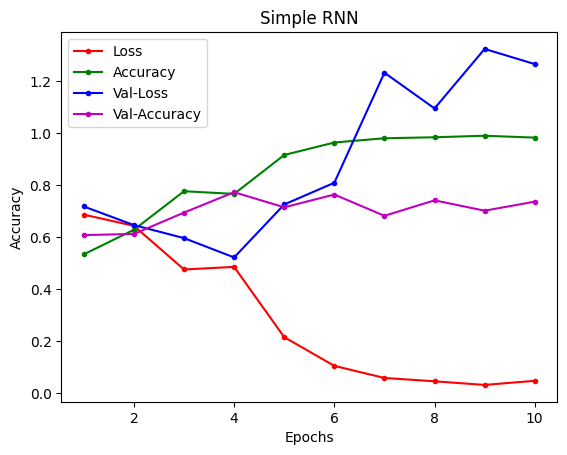

In [41]:
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(1,11), history.history['loss'], color = 'r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history.history['accuracy'], color = 'g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history.history['val_loss'], color = 'b', label = 'Val-Loss', marker = '.')
plt.plot(range(1,11), history.history['val_accuracy'], color = 'm', label = 'Val-Accuracy', marker = '.')
plt.legend()
plt.show()

### Build the model for LSTM

In [43]:
model_lstm = Sequential( [
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Bidirectional(LSTM(32)),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile LSTM model

In [44]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train LSTM model

In [45]:
history_lstm = model_lstm.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 89s 109ms/step - loss: 0.4775 - accuracy: 0.7554 - val_loss: 0.3586 - val_accuracy: 0.8439
Epoch 2/10
782/782 [==============================] - 77s 98ms/step - loss: 0.2999 - accuracy: 0.8822 - val_loss: 0.3551 - val_accuracy: 0.8475
Epoch 3/10
782/782 [==============================] - 81s 104ms/step - loss: 0.2441 - accuracy: 0.9076 - val_loss: 0.3717 - val_accuracy: 0.8439
Epoch 4/10
782/782 [==============================] - 82s 105ms/step - loss: 0.1971 - accuracy: 0.9273 - val_loss: 0.4270 - val_accuracy: 0.8383
Epoch 5/10
782/782 [==============================] - 82s 105ms/step - loss: 0.1625 - accuracy: 0.9412 - val_loss: 0.5087 - val_accuracy: 0.8309
Epoch 6/10
782/782 [==============================] - 74s 95ms/step - loss: 0.1301 - accuracy: 0.9542 - val_loss: 0.5363 - val_accuracy: 0.8286
Epoch 7/10
782/782 [==============================] - 85s 109ms/step - loss: 0.1086 - accuracy: 0.9636 - val_loss: 0.6232 - val_accu

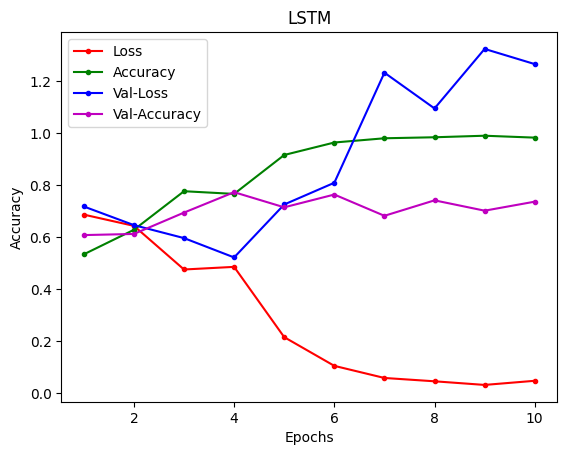

In [47]:
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(1,11), history.history['loss'], color = 'r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history.history['accuracy'], color = 'g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history.history['val_loss'], color = 'b', label = 'Val-Loss', marker = '.')
plt.plot(range(1,11), history.history['val_accuracy'], color = 'm', label = 'Val-Accuracy', marker = '.')
plt.legend()
plt.show()

In [48]:
model_gru = Sequential( [
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Bidirectional(GRU(32)),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Complie GRU model

In [49]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train GRU model

In [50]:
history_gru = model_gru.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 87s 106ms/step - loss: 0.4871 - accuracy: 0.7449 - val_loss: 0.3399 - val_accuracy: 0.8520
Epoch 2/10
782/782 [==============================] - 78s 99ms/step - loss: 0.2867 - accuracy: 0.8841 - val_loss: 0.3750 - val_accuracy: 0.8458
Epoch 3/10
782/782 [==============================] - 81s 103ms/step - loss: 0.2212 - accuracy: 0.9162 - val_loss: 0.3763 - val_accuracy: 0.8435
Epoch 4/10
782/782 [==============================] - 76s 97ms/step - loss: 0.1645 - accuracy: 0.9402 - val_loss: 0.4758 - val_accuracy: 0.8365
Epoch 5/10
782/782 [==============================] - 79s 101ms/step - loss: 0.1171 - accuracy: 0.9594 - val_loss: 0.5448 - val_accuracy: 0.8277
Epoch 6/10
782/782 [==============================] - 79s 102ms/step - loss: 0.0780 - accuracy: 0.9738 - val_loss: 0.5744 - val_accuracy: 0.8247
Epoch 7/10
782/782 [==============================] - 113s 144ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.7619 - val_acc

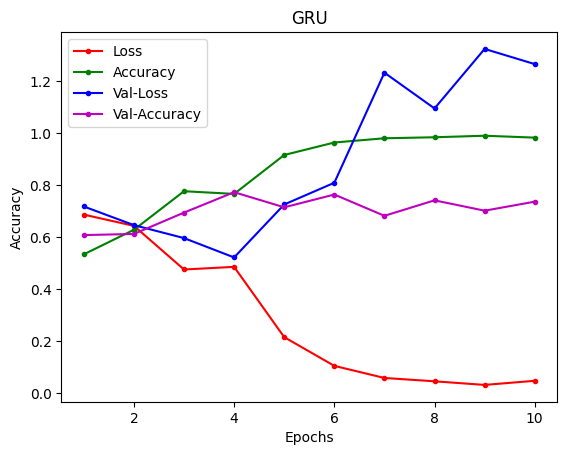

In [51]:
plt.title('GRU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(1,11), history.history['loss'], color = 'r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history.history['accuracy'], color = 'g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history.history['val_loss'], color = 'b', label = 'Val-Loss', marker = '.')
plt.plot(range(1,11), history.history['val_accuracy'], color = 'm', label = 'Val-Accuracy', marker = '.')
plt.legend()
plt.show()

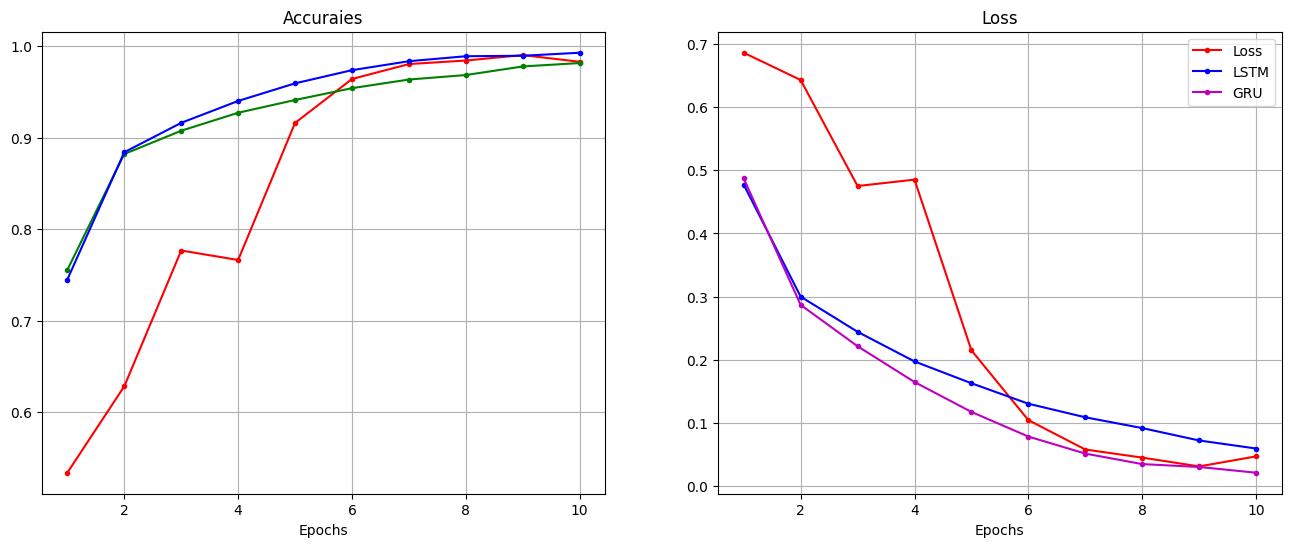

In [56]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Accuraies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['accuracy'], color = 'r', label = 'RNN', marker = '.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color = 'g', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['accuracy'], color = 'b', label = 'GRU', marker = '.')


plt.subplot(1,2,2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color = 'r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['loss'], color = 'b', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['loss'], color = 'm', label = 'GRU', marker = '.')
plt.legend(loc='upper right')

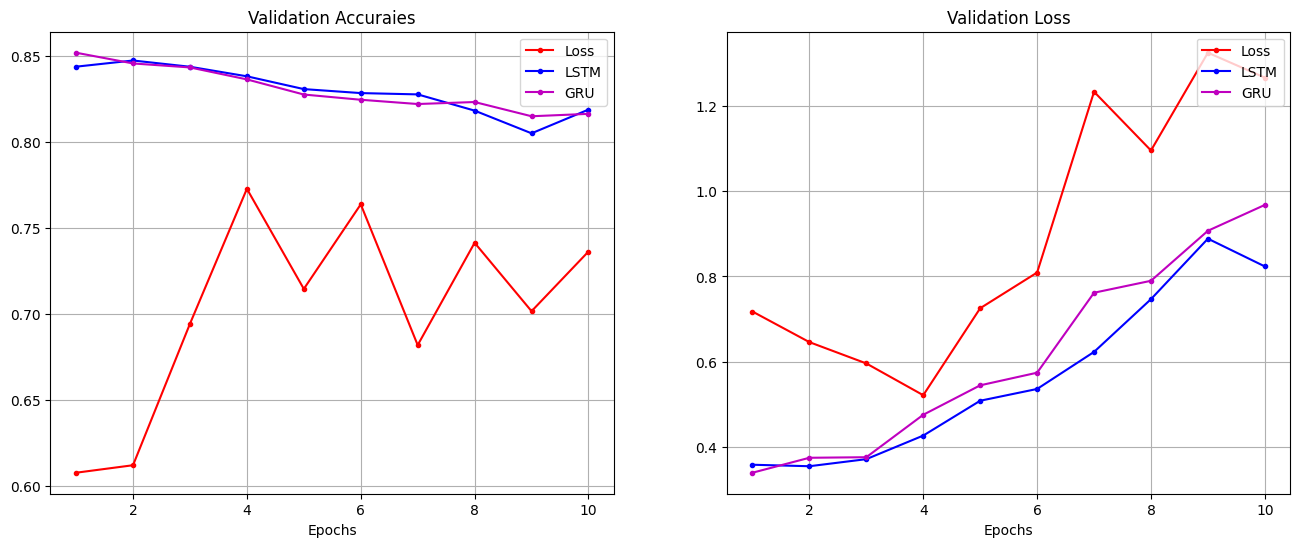

In [58]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Validation Accuraies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_accuracy'], color = 'r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color = 'b', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color = 'm', label = 'GRU', marker = '.')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_loss'], color = 'r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color = 'b', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['val_loss'], color = 'm', label = 'GRU', marker = '.')
plt.legend(loc='upper right')

In [59]:
new1 = 'This was worst movie. Please do not watch it. Waste of money and time'
new2 = 'A must watch movie. I loved to watch it. It was just amazing!'

In [61]:
def predict(model, text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length)
    pred = model.predict(padded)
    if pred > 0.5:
        print('Positive')
    else:
        print('Negative')
    return pred

In [62]:
predict(model_lstm, new1)

1/1 [==============================] - 3s 3s/step
Negative


array([[0.00234062]], dtype=float32)

In [63]:
predict(model_lstm, new2)

1/1 [==============================] - 0s 48ms/step
Positive


array([[0.9610753]], dtype=float32)

In [64]:
predict(model_gru, new1)

1/1 [==============================] - 1s 847ms/step
Negative


array([[1.1149112e-06]], dtype=float32)

In [65]:
predict(model_gru, new2)

1/1 [==============================] - 0s 46ms/step
Positive


array([[0.99946964]], dtype=float32)

In [67]:
predict(model_rnn, new1)

1/1 [==============================] - 1s 799ms/step
Negative


array([[0.00114641]], dtype=float32)

In [69]:
predict(model_rnn, new2)

1/1 [==============================] - 0s 19ms/step
Positive


array([[0.99988127]], dtype=float32)

In [70]:
def predict2(model, text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_length, truncating=trunc_type)

    result = model.predict(pad, verbose = False)
    percent_pos = result[0, 0]
    if round(percent_pos) == 0:
        return((1-percent_pos),"Negative")
    else:
        return(percent_pos, "Positive")

    return pred


In [73]:
predict(model_lstm, new1), predict(model_lstm, new2)

1/1 [==============================] - 0s 26ms/step
Negative
1/1 [==============================] - 0s 23ms/step
Positive


(array([[0.00234062]], dtype=float32), array([[0.9610753]], dtype=float32))

In [72]:
predict(model_gru, new1), predict(model_gru, new2)

1/1 [==============================] - 0s 47ms/step
Negative
1/1 [==============================] - 0s 49ms/step
Positive


(array([[1.1149112e-06]], dtype=float32), array([[0.99946964]], dtype=float32))

In [74]:
predict(model_rnn, new1), predict(model_rnn, new2)

1/1 [==============================] - 0s 20ms/step
Negative
1/1 [==============================] - 0s 19ms/step
Positive


(array([[0.00114641]], dtype=float32), array([[0.99988127]], dtype=float32))